# From Hypothesis Testing to Parameter Estimation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Measuring the Bayes Factor

BF = <sup>P(D<sub>n</sub>|H)</sup>/<sub>P(D<sub>n</sub>|<SPAN STYLE="text-decoration:overline">H</SPAN>)</sub> = <sup>1</sup>/<sub>0.5<sup>n</sup></sub>

### Prior Odds

prior odds = O(H) = <sup>P(H)</sup>/<sub>P(<SPAN STYLE="text-decoration:overline">H</SPAN>)</sub>

Notes:

- Hypotheses is plural of Hopothesis

- Opted for np.arange instead of np.linespace as the resulting floating points are more exact

## Searching for More Hypothesis with Python

In [5]:
dx = 0.01

In [6]:
hypotheses = np.arange(0,1+dx,dx)

In [7]:
def bayes_factor(h_top, h_bottom):
    num = (h_top**24) * ((1-h_top)**76)
    denom = (h_bottom**24) * ((1-h_bottom)**76)
    return num/denom

In [8]:
bayes_factors = [bayes_factor(h, 0.5) for h in hypotheses]
bayes_factors = np.array(bayes_factors)

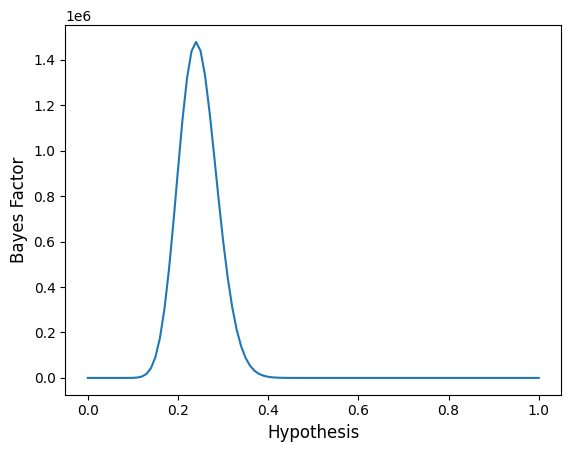

In [9]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Bayes Factor', fontsize=12)
plt.plot(hypotheses, bayes_factors)

Largest Bayes Factor

In [10]:
max(bayes_factors)

1478775.9567598568

Hypothesis associated with largest Bayes Factor

In [11]:
hypotheses[np.argmax(bayes_factors)]

0.24

In [12]:
1/1000

0.001

### Adding Priors to Our Likelihood Ratios


In [13]:
priors = list()

for h in hypotheses:
    if h >= 0.2 and h <= 0.3:
        priors.append(0.001) # 1/1000
    else:
        priors.append(1)

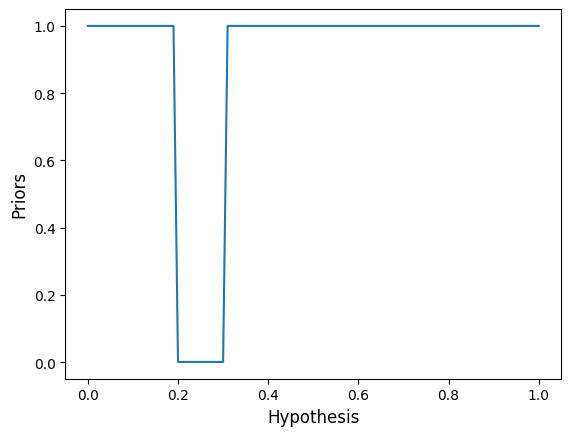

In [15]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Priors', fontsize=12)
plt.plot(hypotheses, priors)

Visualising our prior odds ratios

In [16]:
posteriors = priors * bayes_factors

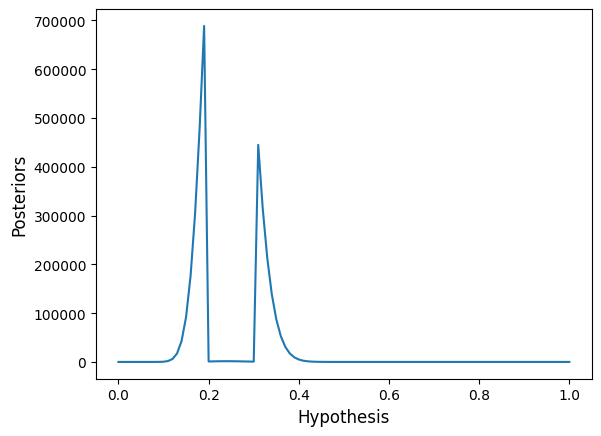

In [17]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Posteriors', fontsize=12)
plt.plot(hypotheses, posteriors)

Plotting our distribution of Bayes factors

### Adding Priors to Our Likelihood Ratios


The sum of our posterior probablities sums to more than one

In [18]:
sum(posteriors)

3140687.468075799

We will normalise our posterior odds so that the do sum up to 1.

To do so, we simply divide each value in our posteriors vector by the sum of all the values:

In [19]:
p_posteriors = posteriors/sum(posteriors)

In [20]:
sum(p_posteriors)

1.0000000000000002

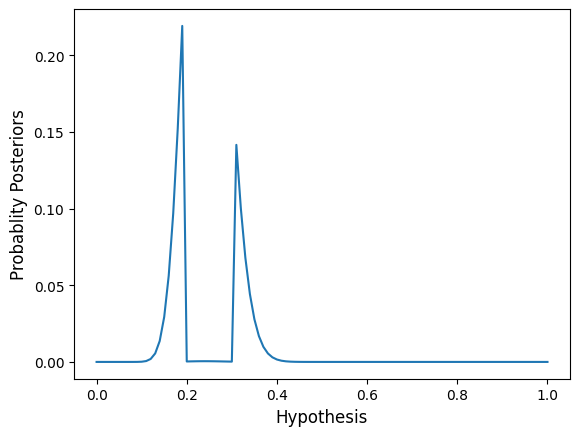

In [21]:
plt.xlabel('Hypothesis', fontsize=12)
plt.ylabel('Probablity Posteriors', fontsize=12)
plt.plot(hypotheses, p_posteriors)

The probability that the prize rate is lower than 0.5 (the attendant's hypothesis) is:

In [29]:
sum(p_posteriors[hypotheses < 0.5])

0.9999995179170433

almost 1. We can be almost certain that the attendant is overstating the true prize rate

We can calculate the expectation of our distribution and use this result as our estimate for the true probability.

The expectation is just the sum of the estimates weighted by their value:

In [31]:
sum(p_posteriors*hypotheses)

0.24027039578371676

We might want to simply choose the most *likely* estimate

In [32]:
hypotheses[np.argmax(p_posteriors)]

0.19

Now we've used the Bayes factor to come up with a range of probablilistic estimates for the true possible rate of winning a prize in the duck game. This means that we've used the Bayes Factor as a form of parameter estimation!

---

# Exercise 1

# Exercise 2

# Exercise 3

# Exercise 4